In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv("../data/MULTI_socio_demo_9_raw.csv")

In [3]:
raw.head()

essround  idno cntry  prtvede1  prtvtdfr  prtvtfhu  prtvtcit  prtvtdpl  \
0         9    17    AT       NaN       NaN       NaN       NaN       NaN   
1         9    31    AT       NaN       NaN       NaN       NaN       NaN   
2         9    58    AT       NaN       NaN       NaN       NaN       NaN   
3         9    69    AT       NaN       NaN       NaN       NaN       NaN   
4         9    98    AT       NaN       NaN       NaN       NaN       NaN   

   agea  domicil  eduyrs  mainact  hincsrca  hinctnta  hincfel  iincsrc  \
0    43        4      12       66         1         3        3       66   
1    85        4       8       66         4         2        1       66   
2    31        3      11       66         1         8        2        1   
3    49        4      12       66         1        88        2       66   
4    67        4      12       66         4         5        2        4   

   Unnamed: 16  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [4]:
countries = ["DE","FR","IT","HU","PL"]

In [5]:
raw2 = raw[raw["cntry"].isin(countries)].drop(columns='Unnamed: 16')

In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'agea':'age',
        'domicil':'urban',
        'eduyrs':'education(yy)',
        'mainact':'activity', 
        'hincsrca':'source_inc_h',
        'hinctnta':'income',
        'hincfel':'satisfaction_inc',
        'iincsrc':'source_inc_p',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu',
        'prtvtcit':'party_it',
        'prtvtdpl':'party_pl'}

In [7]:
multi = raw2.rename(columns=cols).reset_index(drop=True)

In [8]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].fillna(value=0)

In [9]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].astype(int)

### We want to analyse the socio-economic profile of far-right voters. We start by slicing our data frame into subsets for each country

#### DE

In [10]:
de_sode = multi[multi['country']== 'DE']

In [11]:
de_f = de_sode[de_sode["party_de"] == 6].drop(columns=['party_fr',
                                                       'party_it',
                                                       'party_pl',
                                                       'party_hu']).reset_index(drop=True)

In [12]:
de_f.describe()

round          idno  party_de        age      urban  education(yy)  \
count   96.0     96.000000      96.0  96.000000  96.000000      96.000000   
mean     9.0  24836.093750       6.0  54.260417   3.041667      13.468750   
std      0.0  14189.035905       0.0  15.159673   1.014803       2.483432   
min      9.0    239.000000       6.0  19.000000   1.000000       7.000000   
25%      9.0  14038.250000       6.0  43.000000   3.000000      12.000000   
50%      9.0  25177.000000       6.0  55.500000   3.000000      13.000000   
75%      9.0  37397.000000       6.0  66.000000   4.000000      15.000000   
max      9.0  48365.000000       6.0  81.000000   5.000000      21.000000   

        activity  source_inc_h     income  satisfaction_inc  source_inc_p  
count  96.000000     96.000000  96.000000         96.000000     96.000000  
mean   44.447917      2.072917   9.250000          1.906250     16.218750  
std    29.980299      1.445463  16.198765          0.740954     26.521175  
min     1.000000      1.000000   1.000000          1.000000      1.000000  
25%     6.000000      1.000000   3.750000          1.000000      1.000000  
50%    66.000000      1.000000   6.000000          2.000000      3.000000  
75%    66.000000      4.000000   8.000000          2.000000      4.000000  
max    66.000000      6.000000  77.000000          4.000000     66.000000

#### FR

In [13]:
fr_sode = multi[multi['country']== 'FR']

In [14]:
fr_f = fr_sode[fr_sode["party_fr"] == 11].drop(columns=['party_de',
                                                        'party_it',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)



#### IT

In [15]:
it_sode = multi[multi['country']== 'IT']

In [16]:
it_f = it_sode[it_sode["party_it"] == 9].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

#### PL

In [17]:
pl_sode = multi[multi['country']== 'PL']

In [18]:
pl_f = pl_sode[pl_sode["party_pl"] == 6].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_it']).reset_index(drop=True)

#### HU

In [19]:
hu_sode = multi[multi['country']== 'HU']

In [20]:
hu_f = hu_sode[hu_sode["party_hu"] == 3].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_pl',
                                                        'party_it']).reset_index(drop=True)

### Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bfffbd0>]],
      dtype=object)

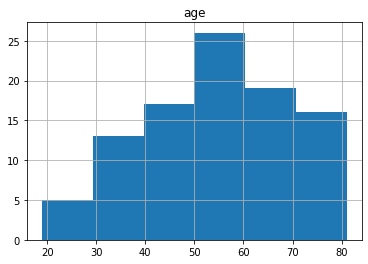

In [21]:
de_f.hist(column='age', bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106f93b50>]],
      dtype=object)

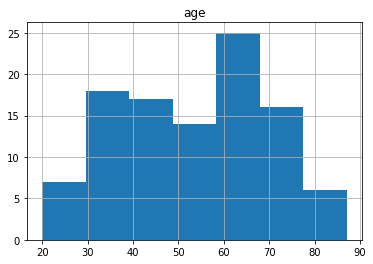

In [22]:
fr_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c565950>]],
      dtype=object)

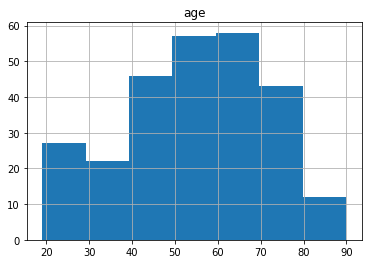

In [23]:
it_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c01d5d0>]],
      dtype=object)

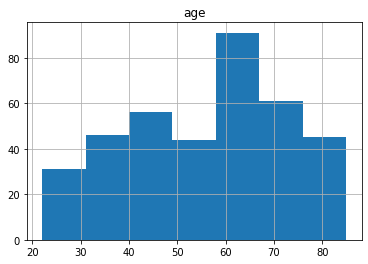

In [24]:
pl_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0c61d0>]],
      dtype=object)

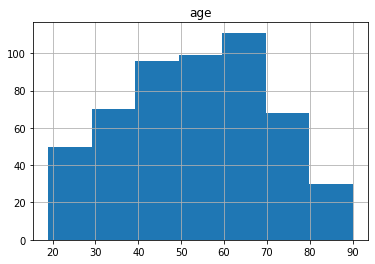

In [25]:
hu_f.hist(column='age', bins=7)

### Urban --> 1:A big city , 2:Suburbs or outskirts of a big city, 3:Town or small city, 4:Country village, 5:Farm or home in countryside

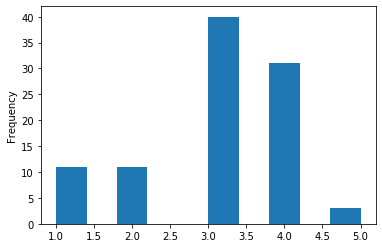

In [26]:
de_f['urban'].plot(kind='hist')

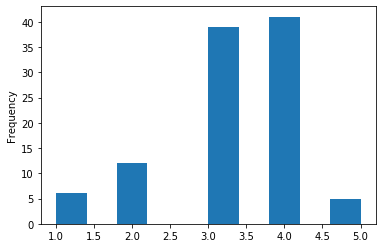

In [27]:
fr_f['urban'].plot(kind='hist')

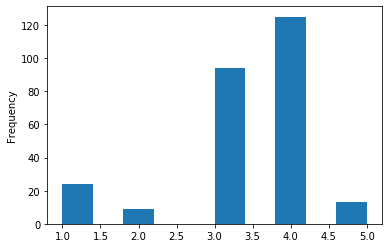

In [28]:
it_f['urban'].plot(kind='hist')

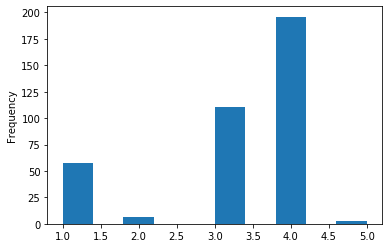

In [29]:
pl_f['urban'].plot(kind='hist')

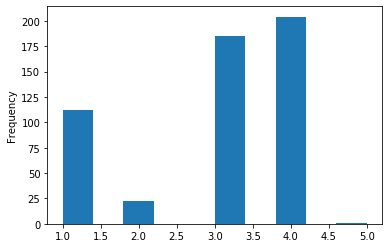

In [30]:
hu_f['urban'].plot(kind='hist')

### Years of full-time education completed

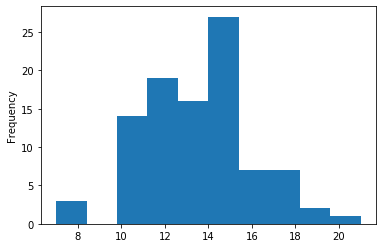

In [31]:
de_f['education(yy)'].plot(kind='hist')

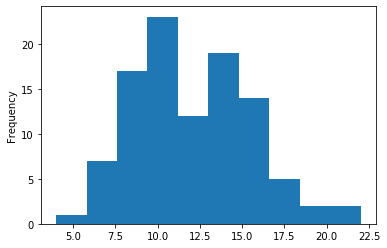

In [32]:
fr_ed = fr_f[~fr_f['education(yy)'].isin([66,77,88,99])]
fr_ed['education(yy)'].plot(kind='hist')

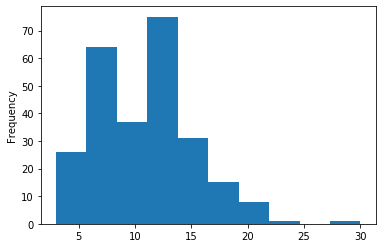

In [33]:
it_ed = it_f[~it_f['education(yy)'].isin([66,77,88,99])]
it_ed['education(yy)'].plot(kind='hist')

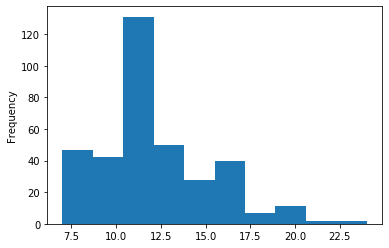

In [34]:
pl_ed = pl_f[~pl_f['education(yy)'].isin([66,77,88,99])]
pl_ed['education(yy)'].plot(kind='hist')

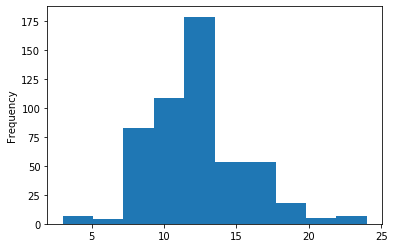

In [35]:
hu_ed = hu_f[~hu_f['education(yy)'].isin([66,77,88,99])]
hu_ed['education(yy)'].plot(kind='hist')

### Main activitiy in the last 7 days --> 1:Paid work, 2:Education, 3:Unemployed(looking for job), 4:Unemployed(not looking for job), 5:Permanently sick or disabled, 6:Retired, 7:Community or military service, 8: Housework, 9:Other

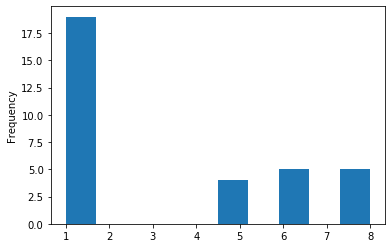

In [41]:
de_ac = de_f[~de_f['activity'].isin([66,77,88,99])]
de_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(63/96)

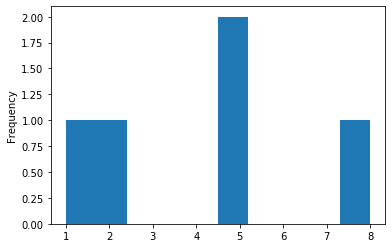

In [42]:
fr_ac = fr_f[~fr_f['activity'].isin([66,77,88,99])]
fr_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(98/103)

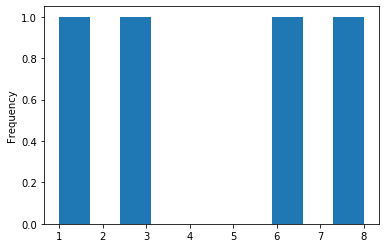

In [52]:
it_ac = it_f[~it_f['activity'].isin([66,77,88,99])]
it_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(261/265)

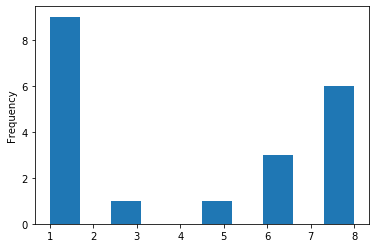

In [56]:
pl_ac = pl_f[~pl_f['activity'].isin([66,77,88,99])]
pl_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(354/374)

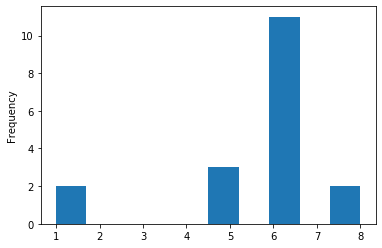

In [59]:
hu_ac = hu_f[~hu_f['activity'].isin([66,77,88,99])]
hu_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(506/524)

### Household´s total income --> 1: 1st decile - 10: 10th decile

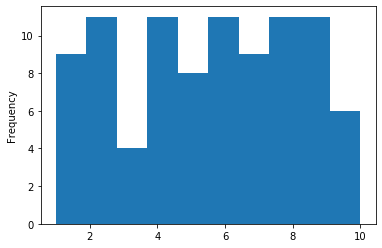

In [60]:
de_in = de_f[~de_f['income'].isin([66,77,88,99])]
de_in['income'].plot(kind='hist')

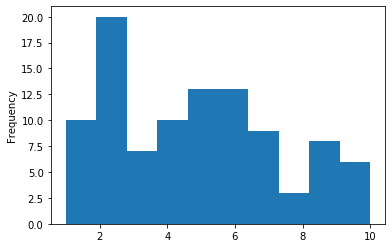

In [62]:
fr_in = fr_f[~fr_f['income'].isin([66,77,88,99])]
fr_in['income'].plot(kind='hist')

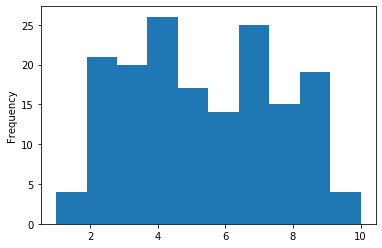

In [67]:
it_in = it_f[~it_f['income'].isin([66,77,88,99])]
it_in['income'].plot(kind='hist')
# Many people decided not to reply(78/265) or didn´t know(22/265)

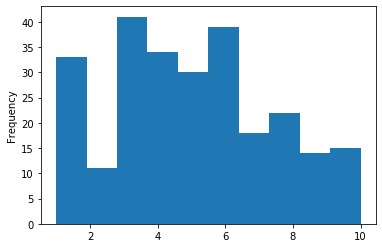

In [71]:
pl_in = pl_f[~pl_f['income'].isin([66,77,88,99])]
pl_in['income'].plot(kind='hist')
# Many people decided not to reply(87/374) or didn´t know(30/374)

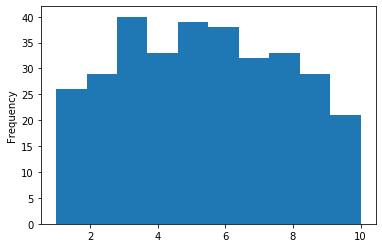

In [75]:
hu_in = hu_f[~hu_f['income'].isin([66,77,88,99])]
hu_in['income'].plot(kind='hist')
# Most people decided not to answer (195/524)

### Feeling abouts household´s income nowadays (satisfaction_inc) --> 1:Living comfortably on present income, 2:Coping on present income, 3:Difficult on present income, 4:Very difficult on present income, 7:Refusal, 8:Don´t know, 9:No answer

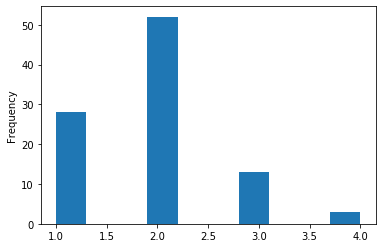

In [79]:
de_sa = de_f[~de_f['satisfaction_inc'].isin([7,8,9])]
de_sa['satisfaction_inc'].plot(kind='hist')

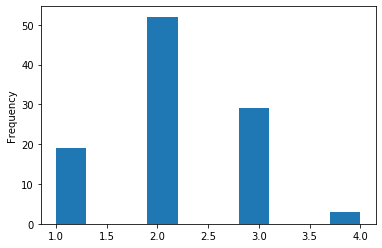

In [80]:
fr_sa = fr_f[~fr_f['satisfaction_inc'].isin([7,8,9])]
fr_sa['satisfaction_inc'].plot(kind='hist')

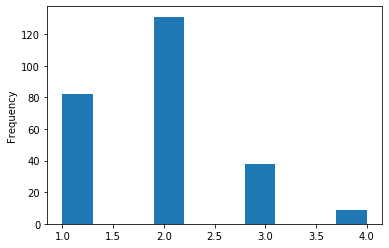

In [82]:
it_sa = it_f[~it_f['satisfaction_inc'].isin([7,8,9])]
it_sa['satisfaction_inc'].plot(kind='hist')

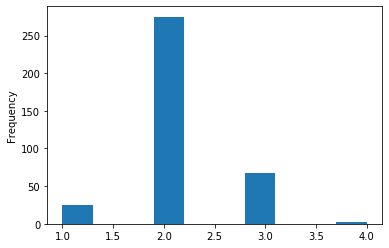

In [84]:
pl_sa = pl_f[~pl_f['satisfaction_inc'].isin([7,8,9])]
pl_sa['satisfaction_inc'].plot(kind='hist')

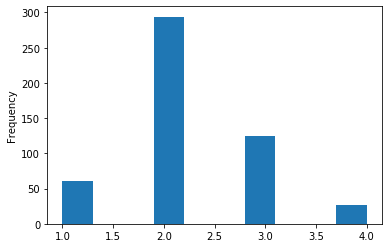

In [86]:
hu_sa = hu_f[~hu_f['satisfaction_inc'].isin([7,8,9])]
hu_sa['satisfaction_inc'].plot(kind='hist')